# UMAP Inverse Transform - Fashion MNIST

In [1]:
import sys
import os
from pathlib import Path

sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import umap
import umap.plot

from utils.data import get_fashion_mnist_image_np_arrays, get_fashion_mnist_labels_np_arrays

c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\np\ufunc\dufunc.py:346: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\np\ufunc\dufunc.py:346: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users

## Load Data

In [2]:
train_images = get_fashion_mnist_image_np_arrays(train=True)
train_labels = get_fashion_mnist_labels_np_arrays(train=True)

# Flatten images for UMAP
data = train_images.reshape(train_images.shape[0], -1)
labels = np.argmax(train_labels, axis=1) # Convert one-hot to indices for plotting

# Add small noise to prevent zero division errors in inverse_transform due to duplicates
data = data + np.random.normal(0, 1e-4, data.shape)


## Fit UMAP

In [3]:
mapper = umap.UMAP(random_state=42).fit(data)

c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## Plot Embeddings

<Axes: >

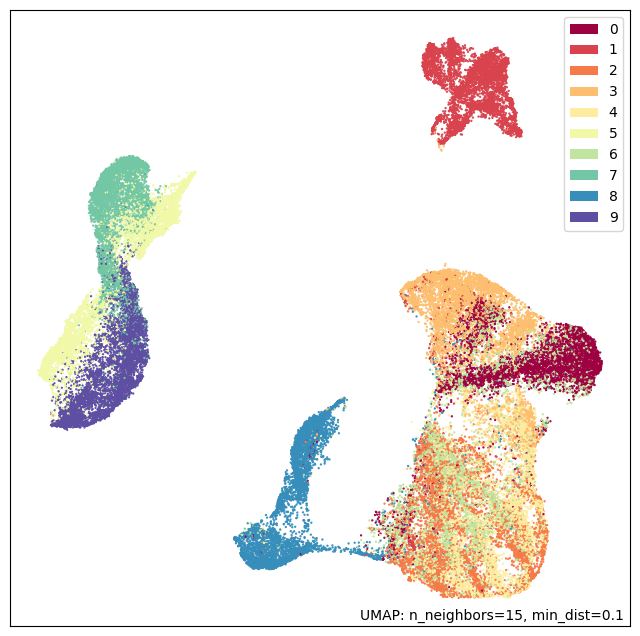

In [4]:
umap.plot.points(mapper, labels=labels)

## Generate Test Points

In [5]:
corners = np.array([
    [-2, -6],  # bags
    [-9, 3],  # boots?
    [7, -5],  # shirts/tops/dresses
    [4, 10],  # pants
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

## Inverse Transform

In [6]:
inv_transformed_points = mapper.inverse_transform(test_pts)

ZeroDivisionError: division by zero

## Visualize Results

In [ ]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28), cmap='gray')
        digit_axes[i, j].set(xticks=[], yticks=[])

plt.show()